## Student Performance Indicator

### Lifecycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perfrm
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1) Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course.

### 2) Data Collection

* Data Source - 
* The data consists of 8 columns and 1000 rows

### 2.1 Importing Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/student.csv')

#### Showing Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [6]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* gender: sex of students - Male/Female
* race_ethnicity: ethnicity of student - Group A,B,C,D,E
* parental level of education: parent's final education - bachelor's degree, some college, master's degree, associate's degree, high school
* lunch: having launch before test(standard or free/reduced)
* test preparation: complete or not complete before test
* math score
* reading score
* writing score

### 3) Data Checks to Perform

* Check for Missing Values
* Check for duplicates
* Check data type
* Check the number of unique values of each categorical column
* Check statistics of data set
* Check various categories presents in the different categorical column

### 3.1 Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check the statistics of the data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
* From the above summary of the numerical data, the mean are very close to each other, between 66 and 69
* All the standard deviation are also close, between 14.6 and 15.19
* While the minimum score for math is 0, the minmum score for writing is 10 and that of reading is 17 which is much higher.

### 3.6) Exploratory Data Analysis

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in gender variable: ", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [13]:
#defining numerical & categorical column
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8) Adding columns for 'Total Score' and 'Average Score'

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f'Number of students with marks less than 20 in Maths: {math_less_20}')
print(f'Number of students with marks less than 20 in Writing: {writing_less_20}')
print(f'Number of students with marks less than 20 in Reading: {reading_less_20}')

Number of students with marks less than 20 in Maths: 4
Number of students with marks less than 20 in Writing: 3
Number of students with marks less than 20 in Reading: 1


#### Insights
* from the above values, we have more students performs worst in Maths
* Best performance is in reading section

### 4) Exploring Data (Visualization)

### 4.1 Visualization of Average Score Distribution (Histogram  & KDE)

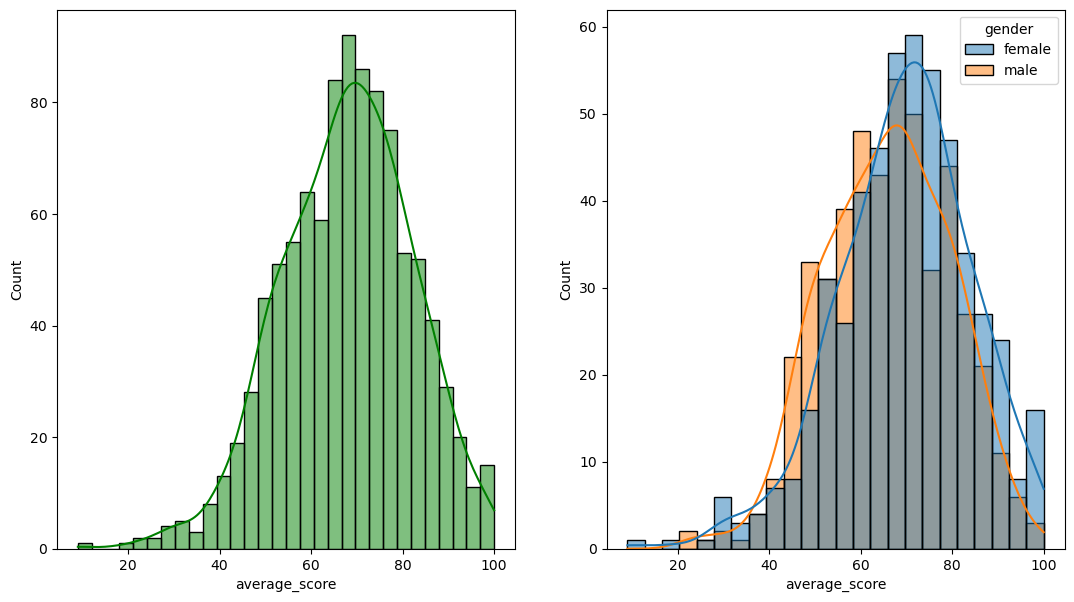

In [17]:
fig, axs = plt.subplots(1,2, figsize=(13,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

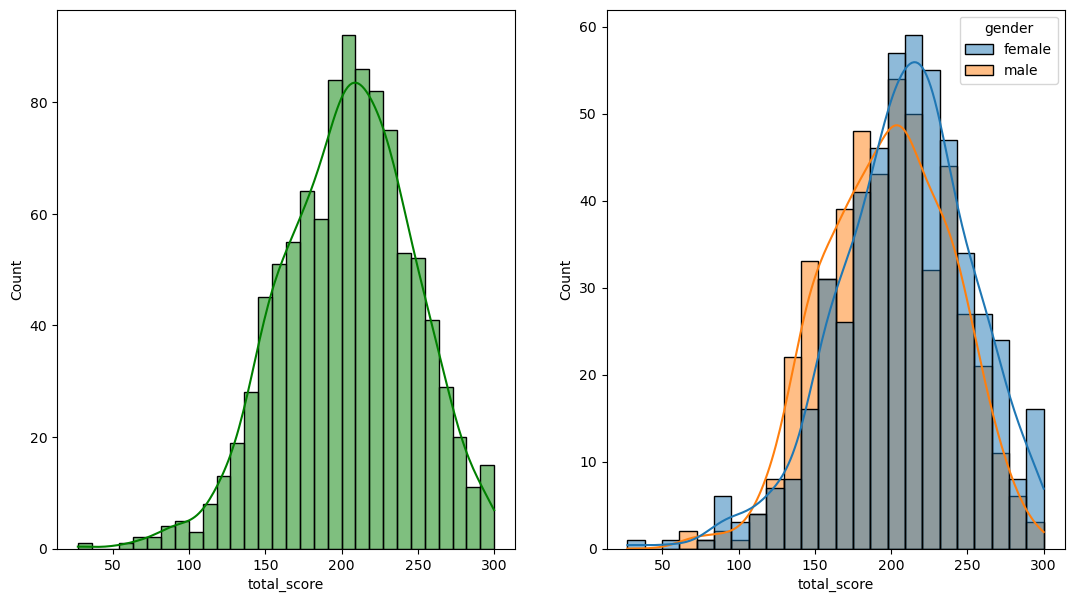

In [18]:
fig, axs = plt.subplots(1,2, figsize=(13,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

#### Insights
* Female students tend to perform better than the male students

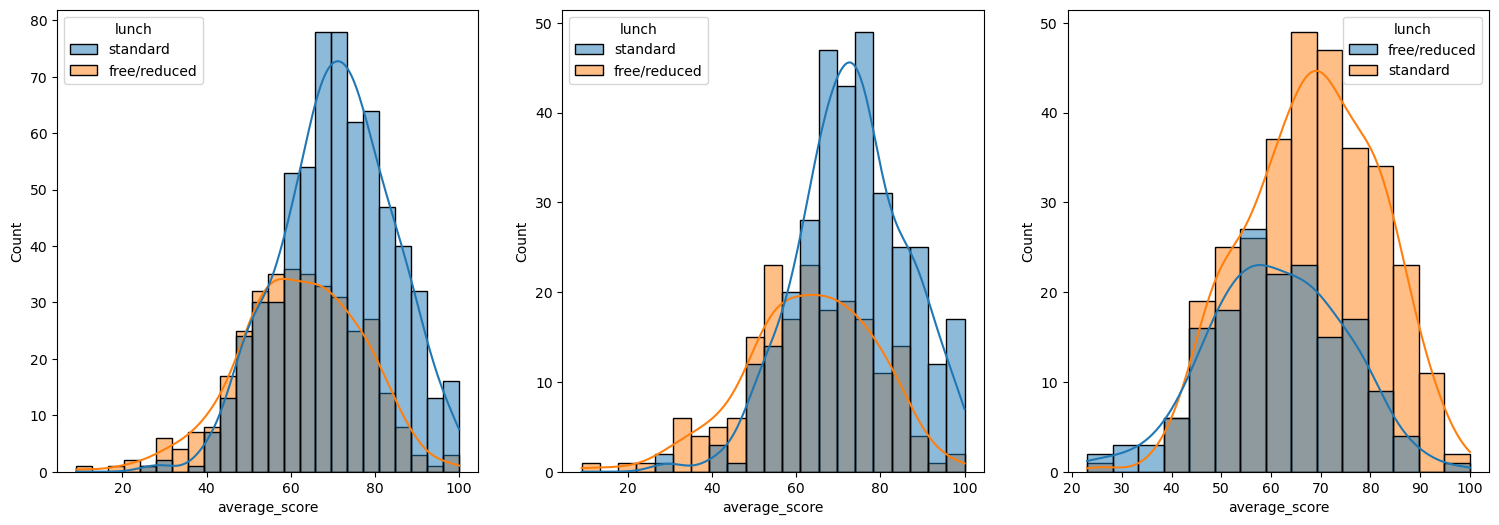

In [19]:
fig, axs = plt.subplots(1,2, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', hue='lunch',  kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.show()

#### Insights
* Standard lunch helps performance exams (be it male or female)

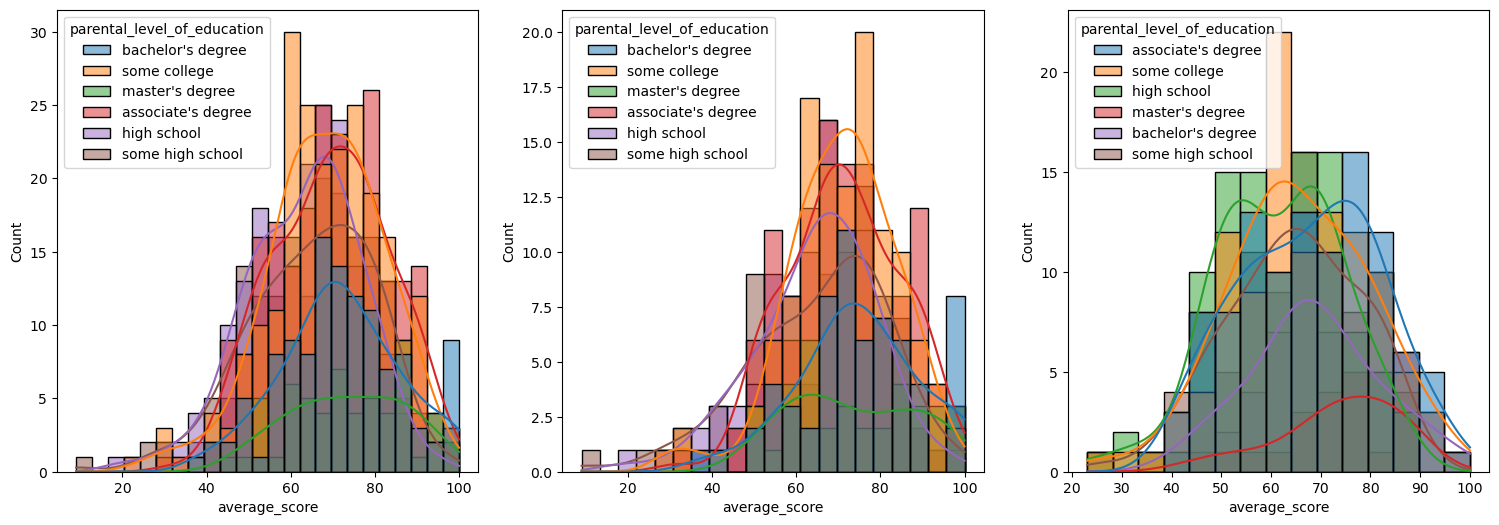

In [20]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', hue='parental_level_of_education',  kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
* In general parent's education does not really have an effect on students performance
* In the second plot, we can see that parents whose education is of associate degeree or master degree have their male child performing well.
* In the second plot, we can see there is no effect of parent's educationn on female students

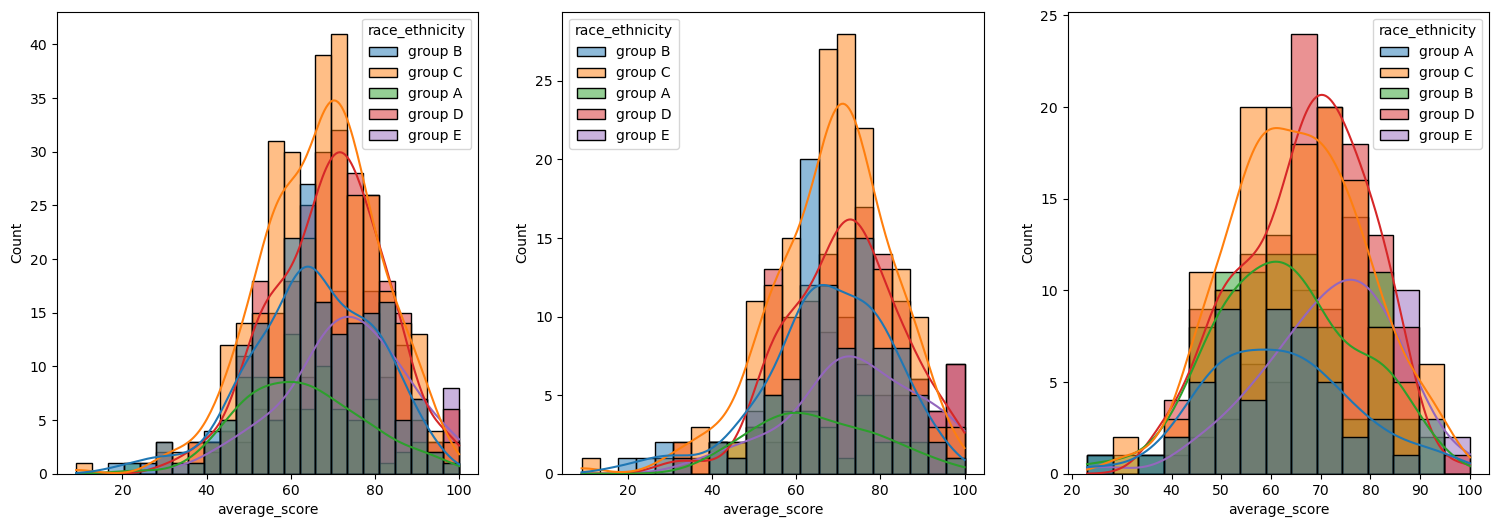

In [21]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', hue='race_ethnicity',  kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.show()

#### Insights
* Students of group A and group B tend to perform poorly in exams irrespective of wheather they are male or female.
* Students of group C and group D thend to perform very well in the exams, with students in group D who are females perform better.

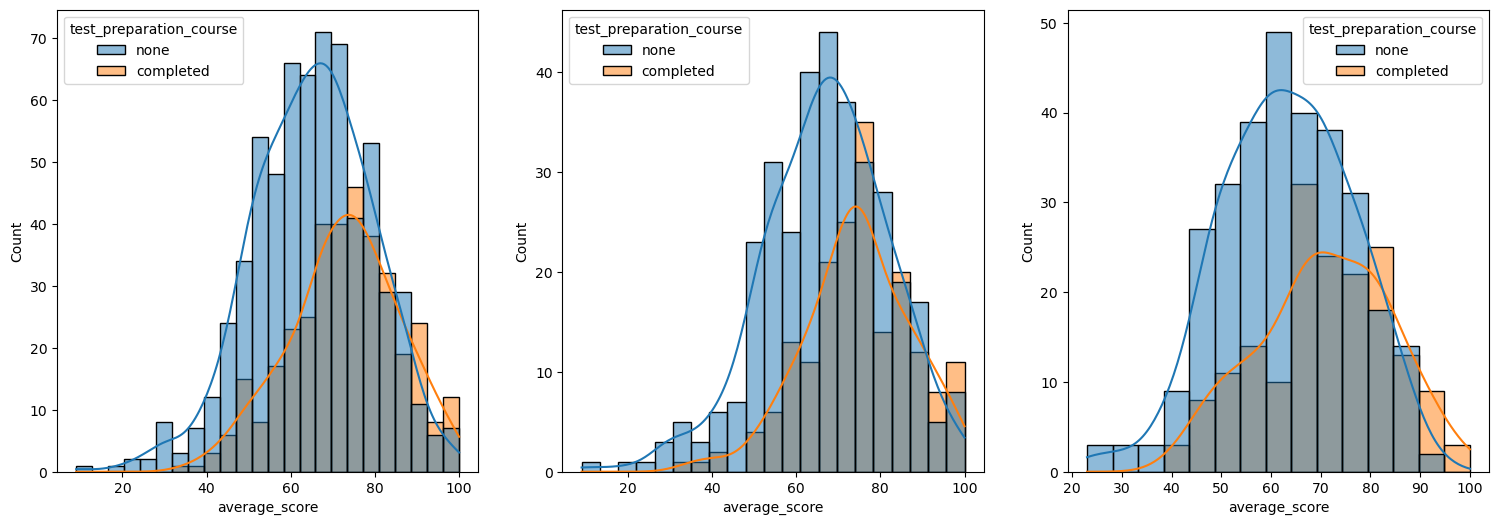

In [22]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', hue='test_preparation_course',  kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='test_preparation_course')
plt.show()

#### Insights
* Student who didn't complete preparetion performed well.
* Both male and female students who didn't complete preparation performed well.

### 4.2 Maximum score of students in all three subjects

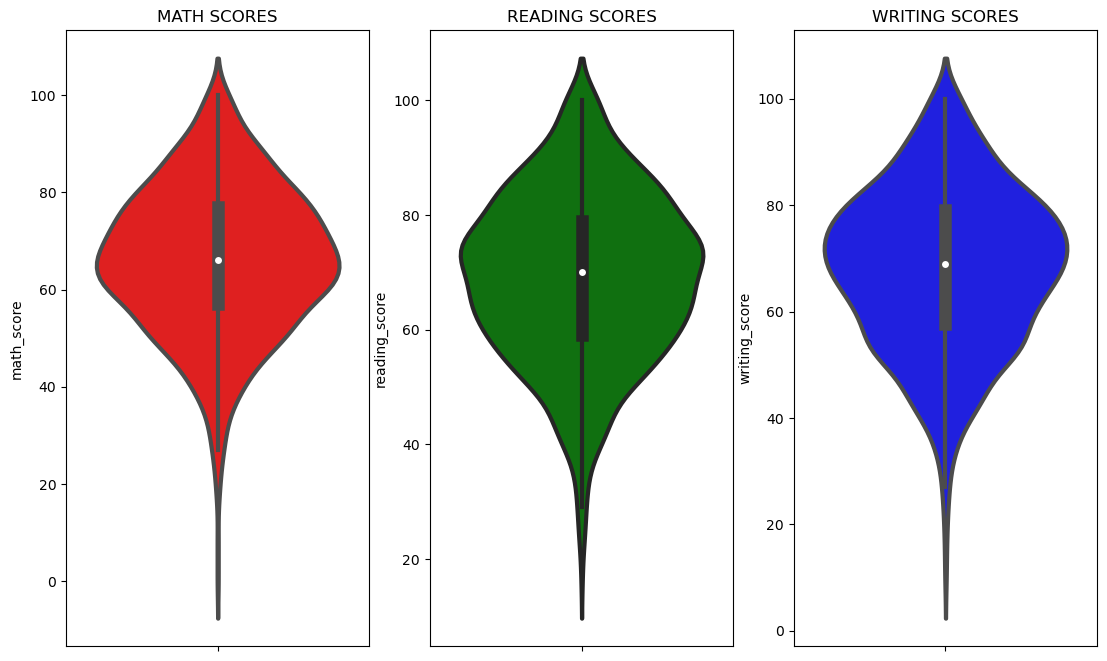

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

#### Insights
* From the 3 plots, it shows that most of the students score between 60-80 in Maths and between 50-80 in both reading and writing

### 4.3 Multivariate Analysis using Pieplot

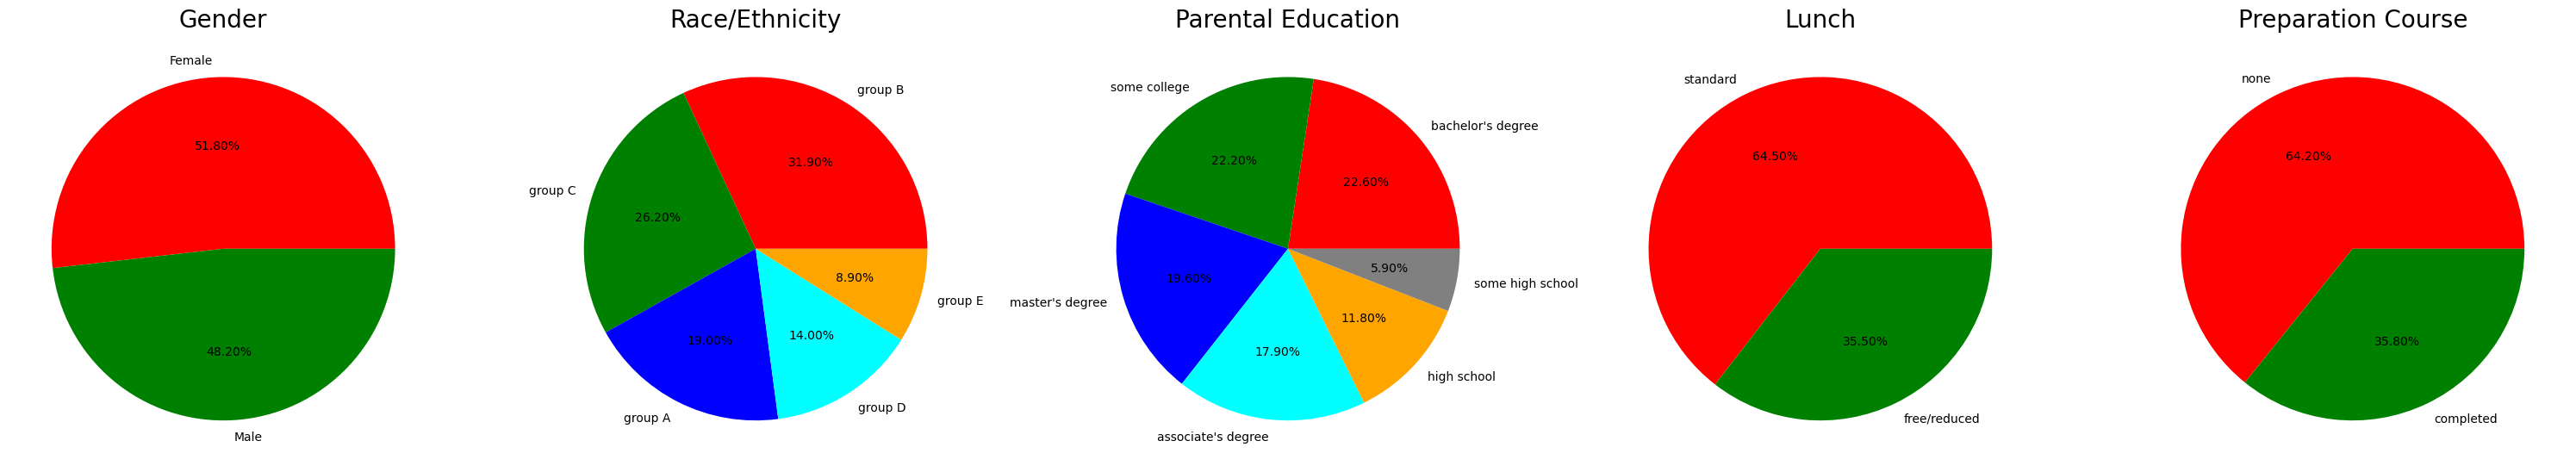

In [24]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
label = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=label, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
label = 'group B','group C','group A','group D','group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=label, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
label = "bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school'
color = ['red', 'green', 'blue', 'cyan', 'orange','grey']

plt.pie(size, colors=color, labels=label, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
label = 'standard', 'free/reduced'
color = ['red', 'green']

plt.pie(size, colors=color, labels=label, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
label = 'none','completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=label, autopct='%.2f%%')
plt.title('Preparation Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
* Number of Males to Females is almost equal
* Number of Students are greatest in Group C
* Number of students whose parental education is "some college" are greater
* Number of student who had standard lunch is greater
* Number of students who didn't complete the prepartion course is greater

### 4.5 Feature Wise Visualization

### Gender Column
* How is the distribution of gender?
* Does gender have any impact on student performance?

### Univerate Analysis (Distribution of Gender)

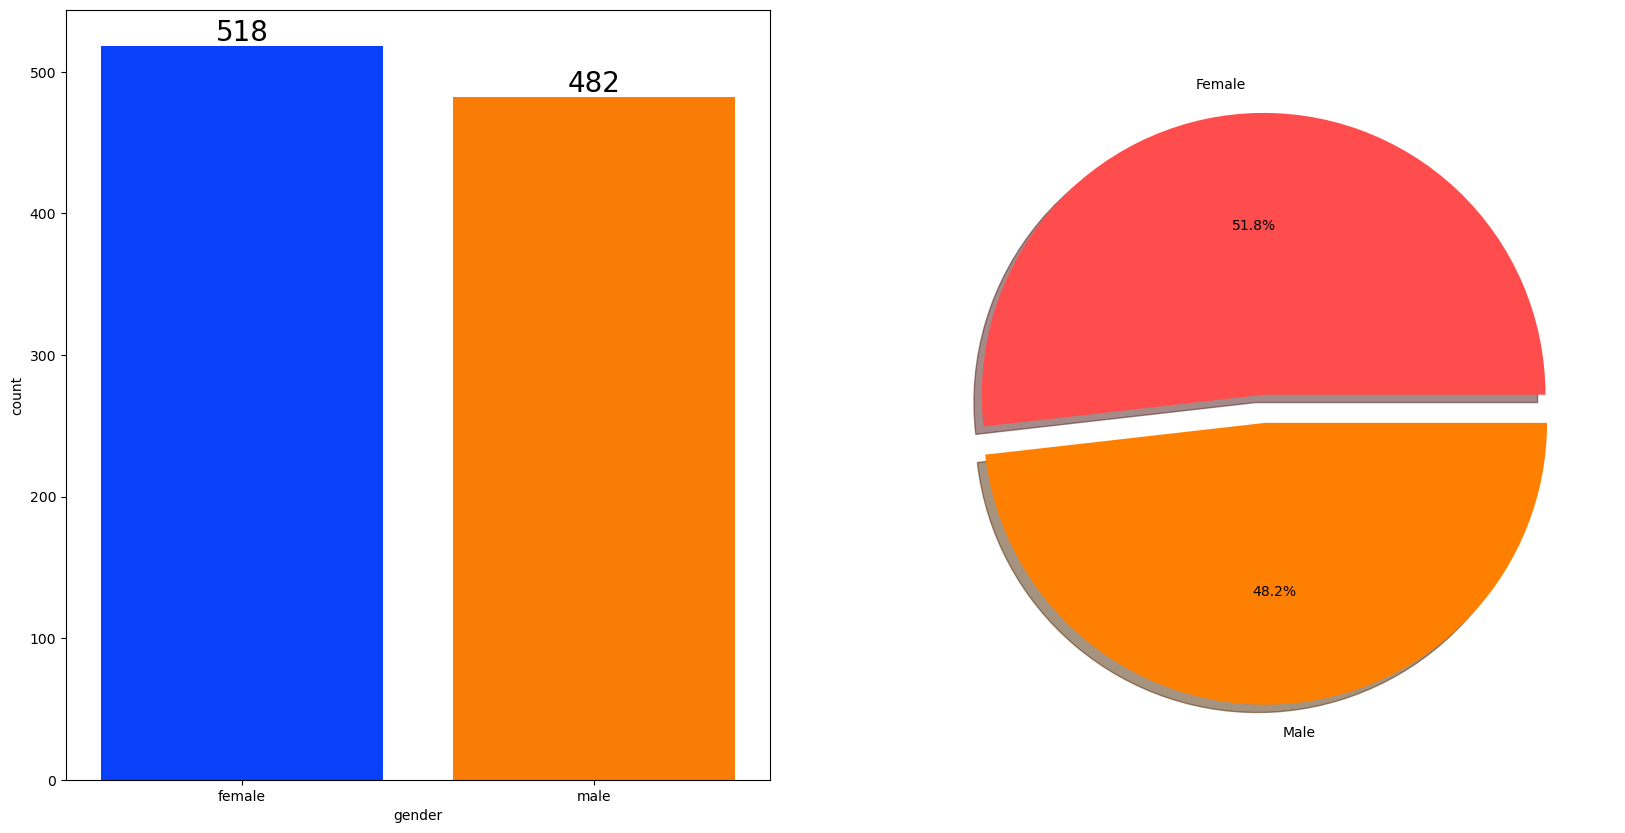

In [25]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Female', 'Male'], explode=[0,0.1], autopct='%1.1f%%', shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
* Gender is balanced with female students at 518(51.8%) and male students at 482(48.2%)

### Bivariate Analysis (Does Gender have an effect on the student performance?)

In [27]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


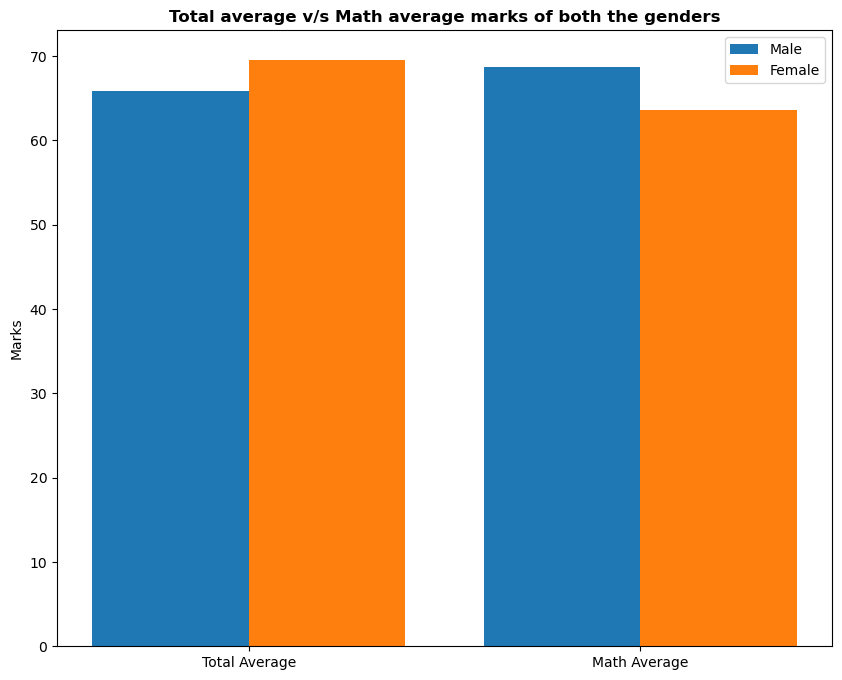

In [28]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* On an average females have a better overall score than male.
* whereas males have scored higher in Maths.

###  Race/Ethnicity Column
* How is Group distributed ?
* Does Race/Ehnicity have any impact on student's performance ?

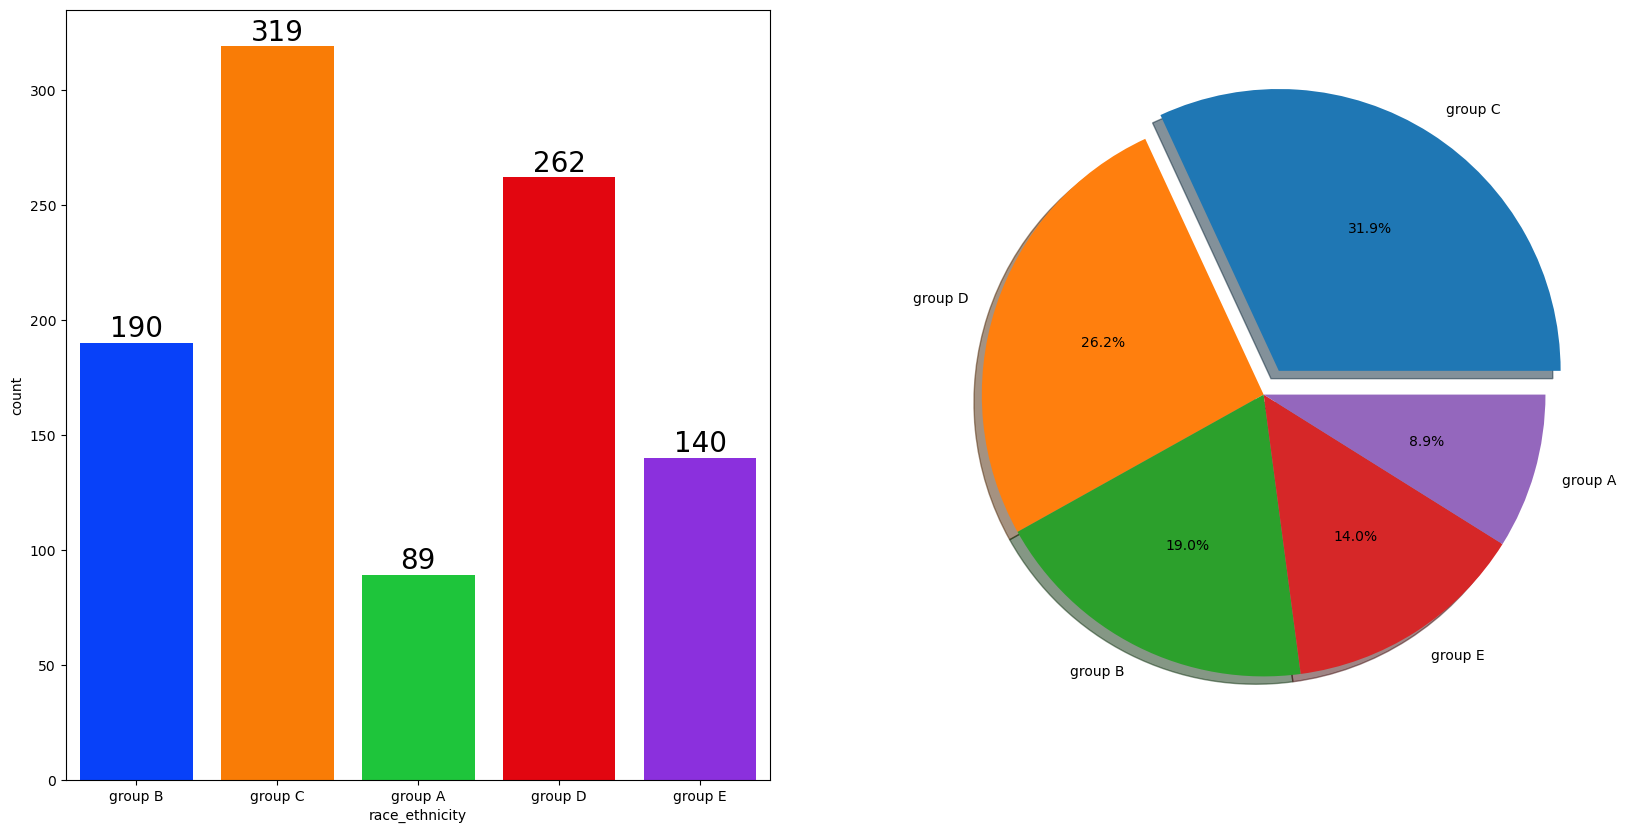

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
* Most of the students belonging from group C /group D.
* Lowest number of students belong to groupA.

### Bivariate Analysis (Does Race/Ehnicity have any impact on student's performance ?)

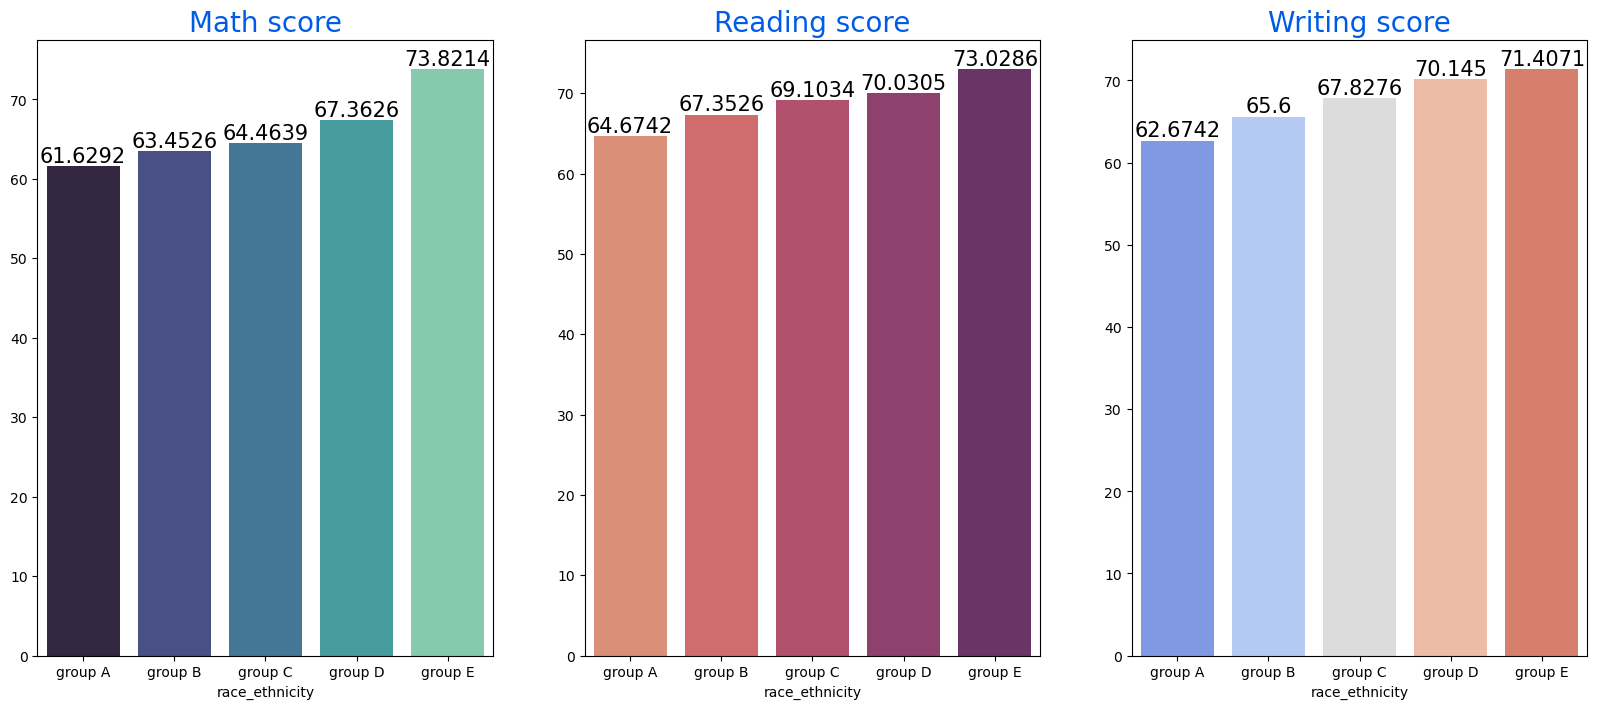

In [31]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

### Bivariate Analysis (Does parental education have any impact on student's performance ?)

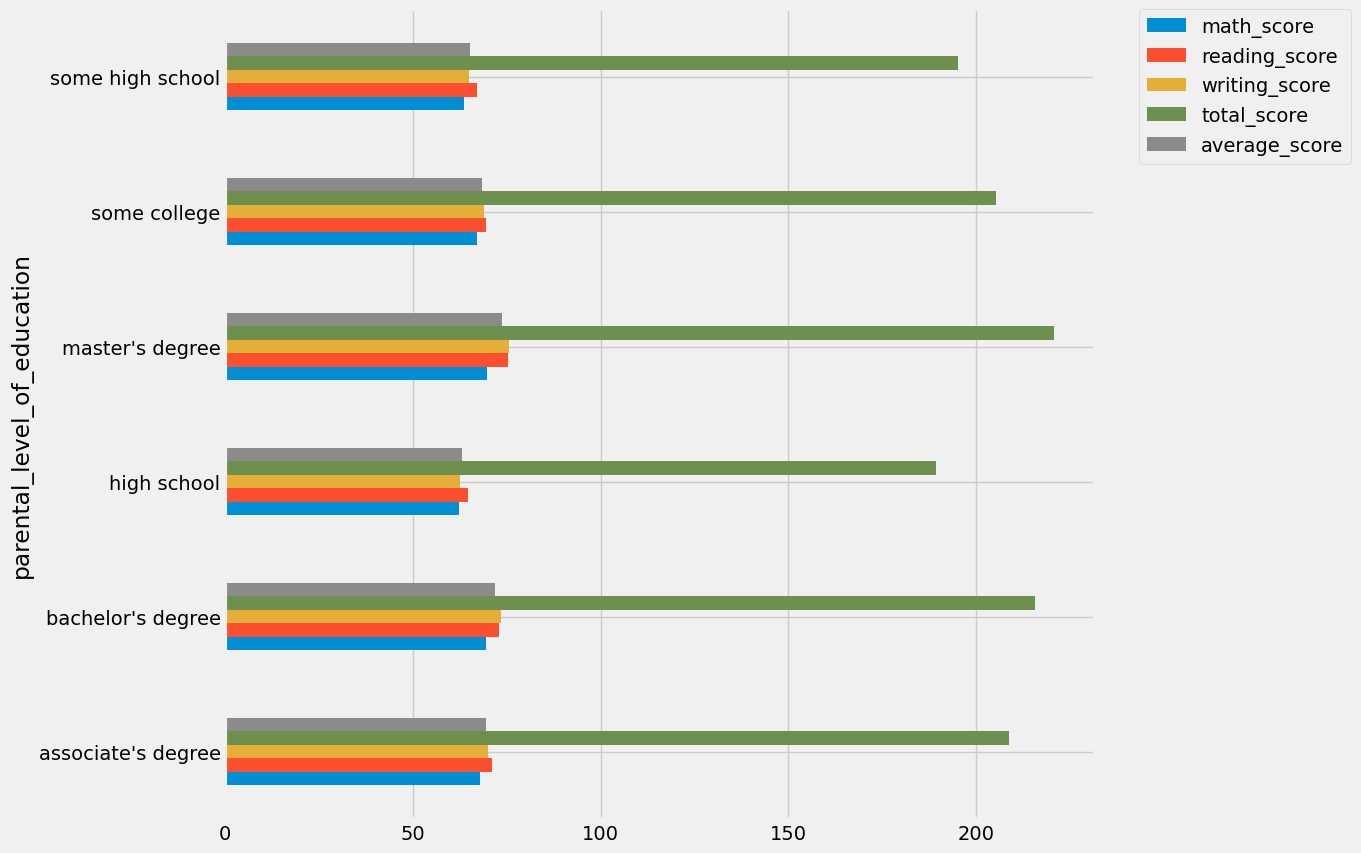

In [33]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insight
* The score of student whose parents possess master and bachelor level education are higher than others.

### BIVARIATE ANALYSIS ( Does lunch type intake have any impact on student's performance ? )

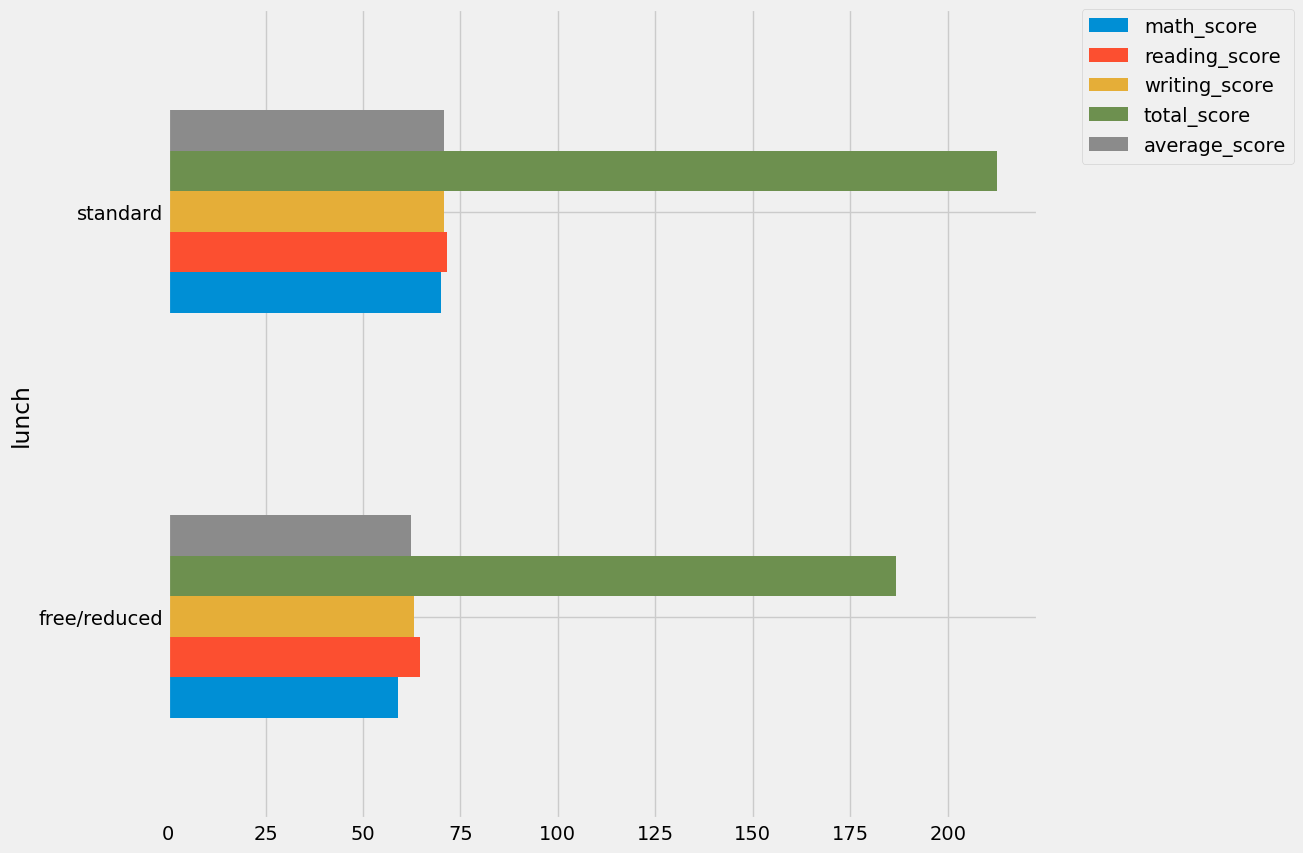

In [35]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insight
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### Test Preparation Course Column
* What is the distrubution of those who completed the prepartion course?
* Does the prepartion course have any impact on students performance?

### Univariate Analysis (What is the distrubution of those who completed the prepartion course?)

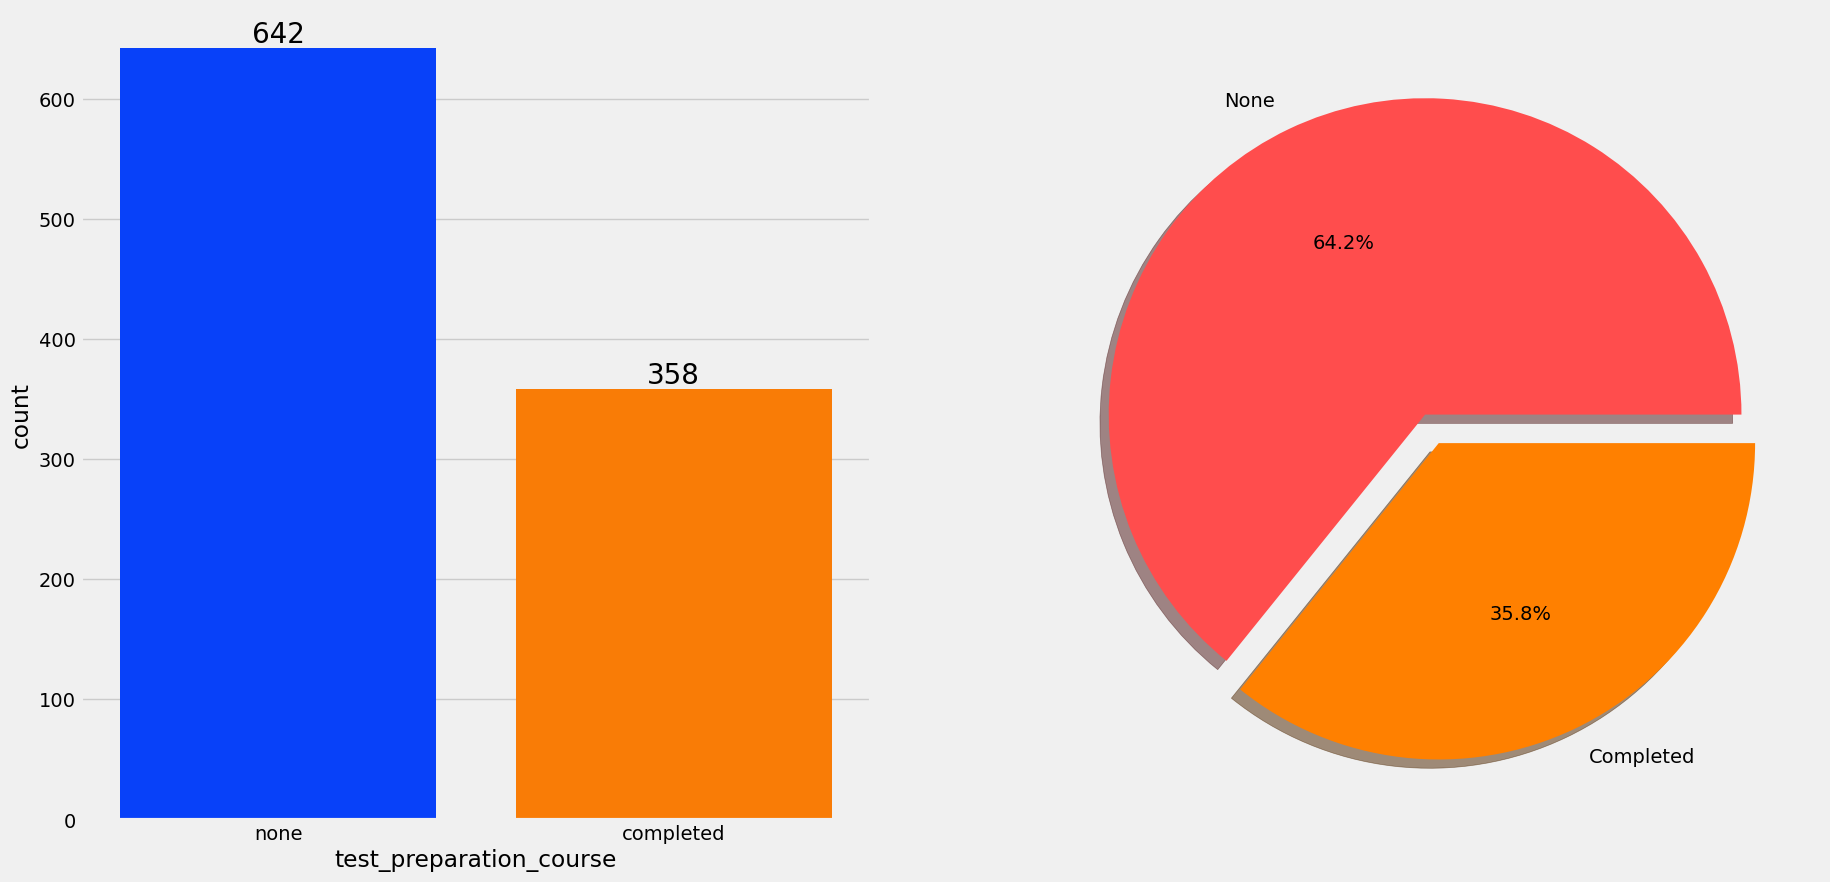

In [36]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['test_preparation_course'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['test_preparation_course'].value_counts(), labels=['None', 'Completed'], explode=[0,0.1], 
        autopct='%1.1f%%', shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
* We have more students not completing the preparation course

### Bivariate Analysis(Does the prepartion course have any impact on students performance?)

In [37]:
prep_group = df.groupby('test_preparation_course').mean()
prep_group

,math_score,reading_score,writing_score,total_score,average_score
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


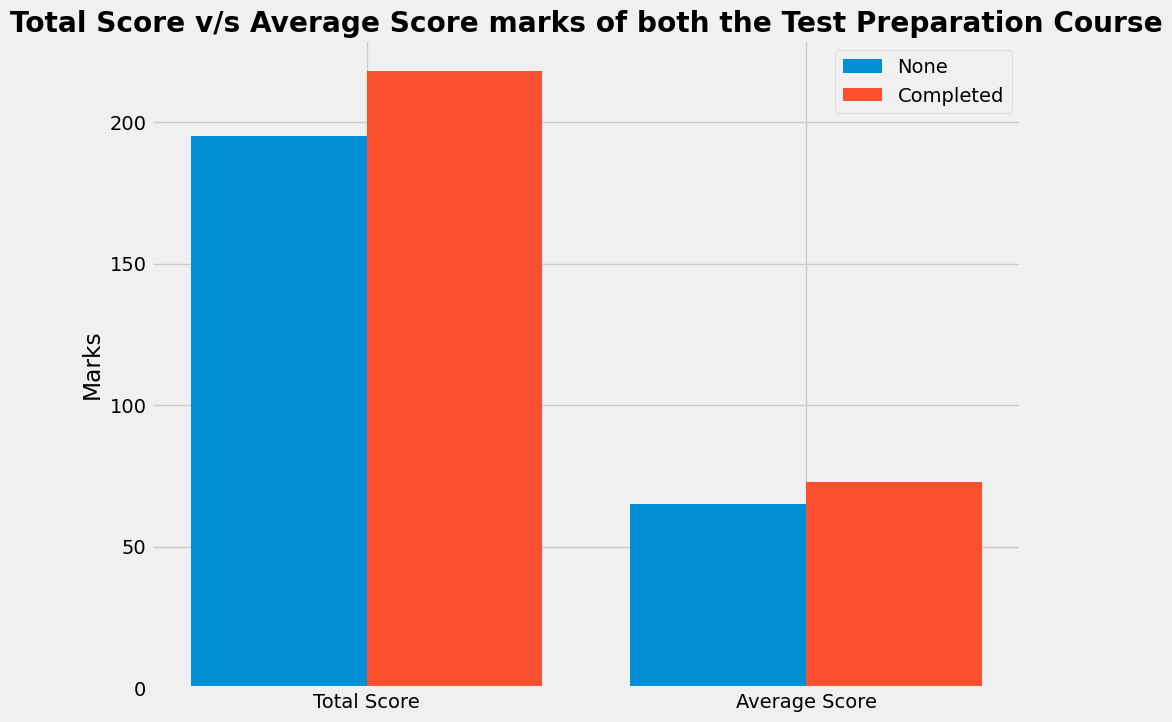

In [38]:
plt.figure(figsize=(10, 8))

X = ['Total Score','Average Score']


completed_scores = [prep_group['total_score'][0], prep_group['average_score'][0]]
none_scores = [prep_group['total_score'][1], prep_group['average_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, none_scores, 0.4, label = 'None')
plt.bar(X_axis + 0.2, completed_scores, 0.4, label = 'Completed')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Score v/s Average Score marks of both the Test Preparation Course", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* Students who completed the test preparation had higher totals and average respectively

### Checking For Outliers

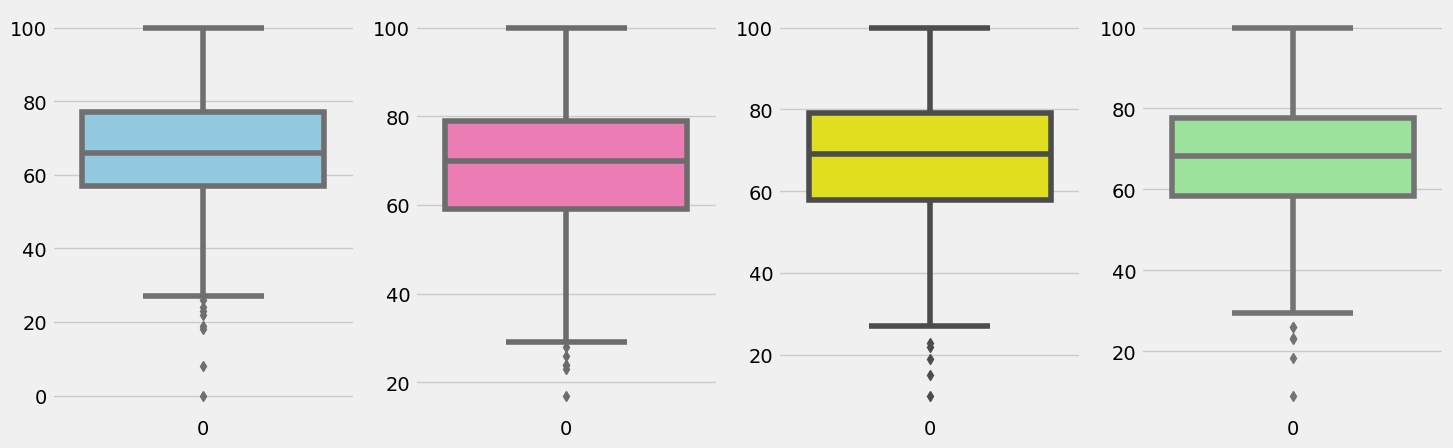

In [39]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### Multivariate Analysis Using Pairplot

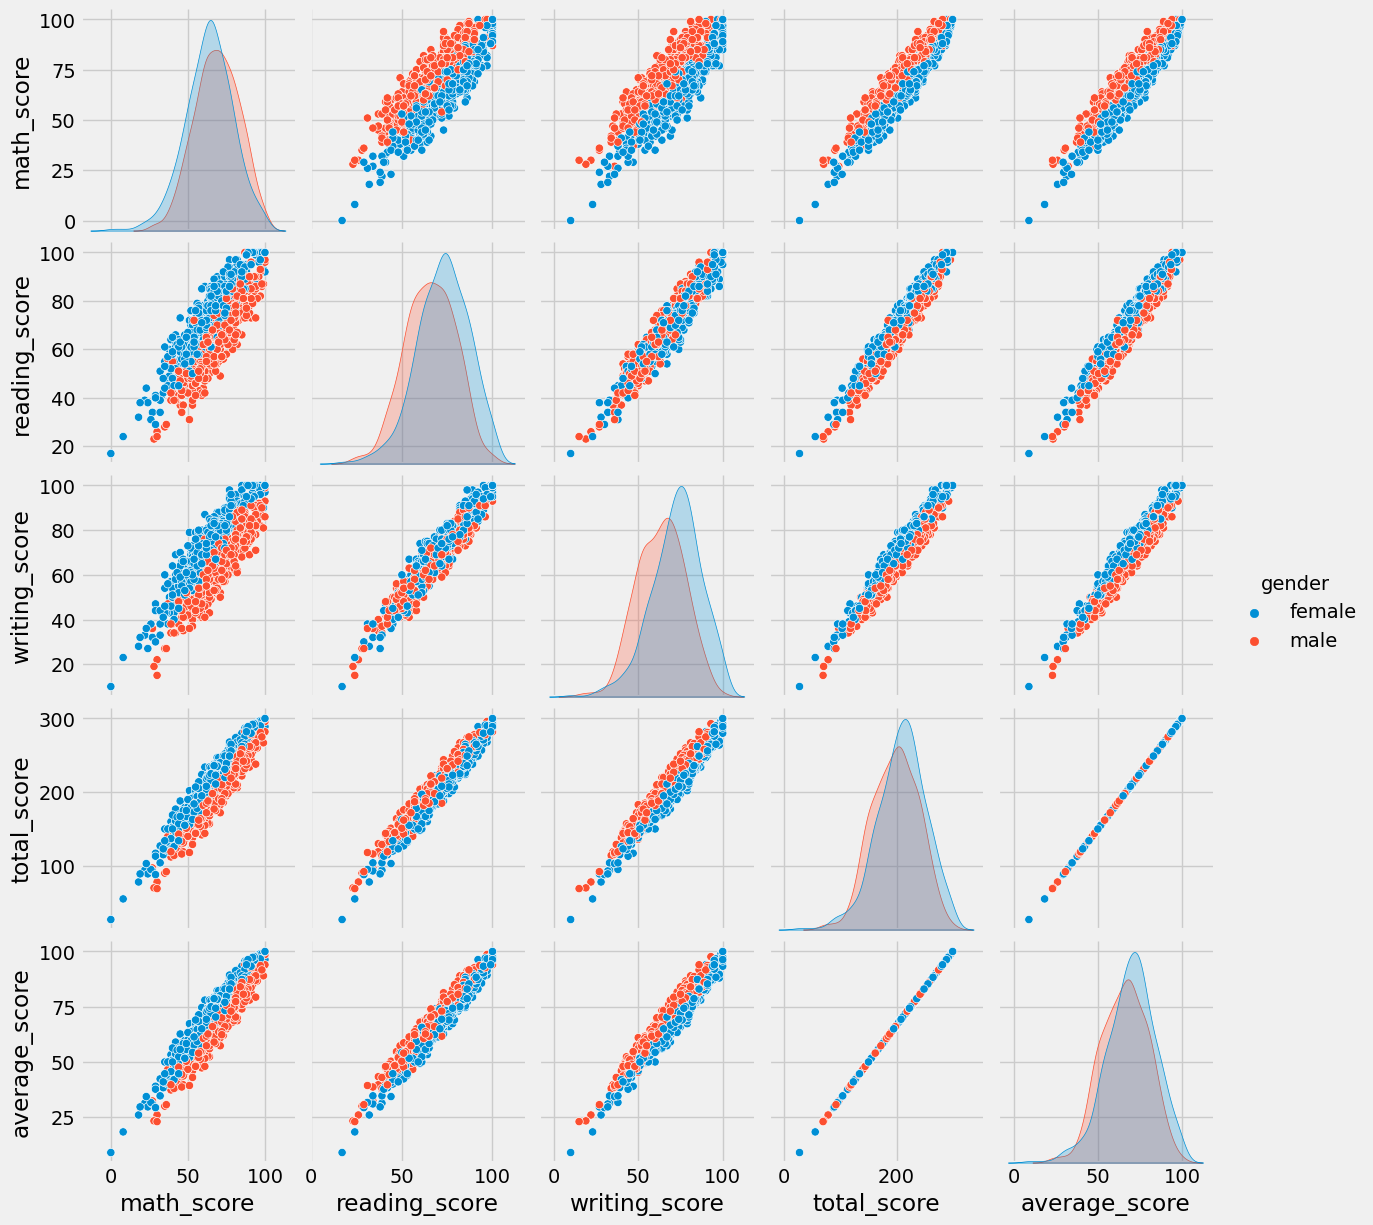

In [40]:
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

### 5) Conclusion

* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is beneficial.